## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### ① 导数

In [1]:
from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
X, Y = data['data'], data['target']

In [4]:
# X[:, 5]

In [5]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [6]:
def loss(y, y_hat):
    """Loss Function"""
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

#### 公式

#### loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

#### loss 对k求偏导
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

#### loss 对b求偏导
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

#### 导数

In [7]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient

In [8]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [9]:
import random

In [10]:
try_times = 2000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 1e-4

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss(Y, price_by_k_and_b)
    
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = k + (-1 * b_gradient) * rate  # b与偏导方向相反
    

when time is 0, best_k is -44.22979529827775, best_b is 51.62497165379176, loss is 63384.196733861805
when time is 50, best_k is -26.690496441799418, best_b is -26.646706488417305, loss is 47728.877755190115
when time is 100, best_k is -15.59492327343805, best_b is -15.567446440589531, loss is 18869.679675302006
when time is 150, best_k is -8.624016560637688, best_b is -8.606788611709707, loss is 7481.053158568732
when time is 200, best_k is -4.244473506735072, best_b is -4.2336845233869935, loss is 2987.3540863979943
when time is 250, best_k is -1.4929810321956336, best_b is -1.4862373944735419, loss is 1214.594344223565
when time is 300, best_k is 0.2356721045056685, best_b is 0.23987421268693435, loss is 515.4649613286763
when time is 350, best_k is 1.321716022371532, best_b is 1.3243213887650511, loss is 239.88678210184884
when time is 400, best_k is 2.004034161558319, best_b is 2.005636358680822, loss is 131.34916749867747
when time is 450, best_k is 2.4327074733873353, best_b is 

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def draw_rm_price():
    plt.scatter(X[:, 5], Y)

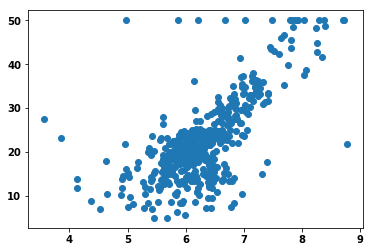

In [13]:
draw_rm_price()

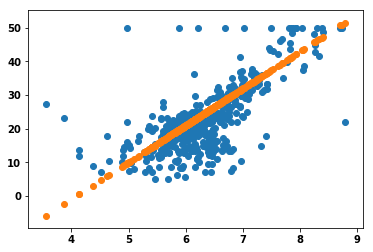

In [14]:
k = 11
b = -45
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

#### ② 动态规划

In [15]:
from collections import defaultdict

In [16]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [17]:
price = defaultdict(int)

In [18]:
for i, p in enumerate(original_price):
    price[i + 1] = p

In [19]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

##### python函数式编程

In [20]:
def example(f, arg):
    return f(arg)

In [21]:
def add_ten(num):
    return num + 10

In [22]:
def mul_ten(num):
    return num * 10 

In [23]:
operations = [add_ten, mul_ten]

for f in operations:
    print(example(f, 100))

110
1000


#### 装饰器

#### 无参数

In [24]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    
    print('function: {} called once! '.format(f.__name__))
    called_time[f.__name__] += 1
    
    return result

In [25]:
def some_funcion_1(): 
    print('I am function 1')

In [26]:
get_call_times(some_funcion_1)

I am function 1
function: some_funcion_1 called once! 


In [27]:
called_time

defaultdict(int, {'some_funcion_1': 1})

#### 有参数

In [28]:
from functools import wraps

In [29]:
called_time_with_arg = defaultdict(int)
def get_call_time(f):
    @wraps(f)
    def wrap(n):
        result = f(n)
        
        called_time_with_arg[(f.__name__, n)] += 1
        
        return result
    return wrap

In [30]:
def add_ten(n): return n + 10

In [31]:
add_ten = get_call_time(add_ten)
add_ten(10)

20

#### @

In [32]:
@get_call_time
def add_twenty(n): 
    return n + 20

In [33]:
# 相当于 add_twenty = get_call_time(add_twenty)

In [34]:
add_twenty(9)

29

#### ③ Cutting Problem

In [35]:
solution = {}

In [36]:
price

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [37]:
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [38]:
r(10)

30

In [39]:
solution

{1: [1, 0],
 2: [2, 0],
 3: [3, 0],
 4: [2, 2],
 5: [2, 3],
 6: [6, 0],
 7: [1, 6],
 8: [2, 6],
 9: [3, 6],
 10: [10, 0]}

In [40]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [41]:
#r(105)

In [42]:
#parse_solution(105)

### Dynamic Programming

+ 1.Overlapping Subproblems
+ 2.Overlapping computing saved in a table
+ 3.Parse solution

In [43]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return wrap

In [44]:
@memo
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(n - i) + r(i), i) for i in range(1, n)])
    solution[n] = [n - max_split, max_split]
    return max_price

In [45]:
#r(20)

In [46]:
#r(105)

In [47]:
def parse_solution(n):
    left_split, right_split = solution[n]
    
    if right_split == 0: return [left_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [48]:
r(105)

332

In [49]:
parse_solution(105)

[6, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [50]:
r   #不加@wraps(f) r对应的函数是wrap

<function __main__.r(n)>

In [51]:
called_time_with_arg

defaultdict(int, {('add_ten', 10): 1, ('add_twenty', 9): 1})

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

#### 公式
$$ loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|} $$

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

#### 对k求偏导  
$$ loss = \frac{1}{n} \sum{(-x_i)}$$
$$ loss = \frac{1}{n} \sum{(x_i)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|x_i}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|x_i}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

#### 对b求偏导
$$ loss = \frac{1}{n} \sum{(-1)}$$
$$ loss = \frac{1}{n} \sum{(1)}$$

$$ loss = \frac{1}{n} \sum{\frac{|y_i - (kx_i + b_i)|}{y_i - (kx_i + b_i)}} $$
$$ loss = \frac{1}{n} \sum{\frac{|y_i - \hat{y_i})|}{y_i - \hat{y_i}}} $$
$$ y_i != (kx_i + b_i) $$

##### ？？？？？问题很大

In [52]:
def price(rm , k ,b):
    """Price Function"""
    return k * rm + b

In [53]:
def loss_abs(y, y_hat):
    """Loss Function"""
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(y)

In [54]:
def partial_k(x, y ,y_hat):
    """k 偏导"""
    gradient = 0
    n = len(y)
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
#         if y_i == y_hat_i:
#             continue
#         gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i) * x_i 
        if y_i < y_hat_i:
            gradient += x_i
        else:
            gradient -= x_i
            
    return 1 / n * gradient

In [55]:
def partial_b(y, y_hat):
    """b 偏导"""
    gradient = 0
    n = len(y)
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
#         if y_i == y_hat_i:
#             continue
#         gradient += abs(y_i - y_hat_i) / (y_i - y_hat_i)
        if y_i < y_hat_i:
            gradient += 1
        else:
            gradient -= 1
    
    return 1 / n * gradient

In [56]:
try_times = 10000

X, Y = data['data'], data['target']
X_rm = X[:, 5]

min_loss = float('inf') #无穷大

k = random.random() * 200 - 100
b = random.random() * 200 - 100

rate = 0.2

time_log = 0

for i in range(try_times):
    price_by_k_and_b = [price(rm, k, b) for rm in X_rm]
    current_loss = loss_abs(Y, price_by_k_and_b)    
    
    if current_loss < min_loss:
        
        min_loss = current_loss
        
        print("when time is {}, best_k is {}, best_b is {}, loss is {}".format(i, k, b, min_loss))
            
    k_gradient = partial_k(X_rm, Y, price_by_k_and_b)
    b_gradient = partial_b(Y, price_by_k_and_b)
    
    k = k + (-1 * k_gradient) * rate  # k与偏导方向相反
    b = b + (-1 * b_gradient )* rate  # b与偏导方向相反

when time is 0, best_k is 29.22448533539111, best_b is -31.30819288365521, loss is 129.82420628369093
when time is 1, best_k is 27.967558457920752, best_b is -31.50819288365521, loss is 121.72488040715396
when time is 2, best_k is 26.710631580450396, best_b is -31.708192883655208, loss is 113.62555453061712
when time is 3, best_k is 25.45370470298004, best_b is -31.908192883655207, loss is 105.52622865408024
when time is 4, best_k is 24.196777825509685, best_b is -32.10819288365521, loss is 97.42690277754333
when time is 5, best_k is 22.93985094803933, best_b is -32.30819288365521, loss is 89.3275769010064
when time is 6, best_k is 21.682924070568973, best_b is -32.50819288365521, loss is 81.22825102446953
when time is 7, best_k is 20.425997193098617, best_b is -32.708192883655215, loss is 73.12892514793265
when time is 8, best_k is 19.16907031562826, best_b is -32.90819288365522, loss is 65.02959927139567
when time is 9, best_k is 17.912143438157905, best_b is -33.10819288365522, loss

when time is 307, best_k is 9.155784544877358, best_b is -34.86945770578902, loss is 4.444987178502592
when time is 308, best_k is 9.15392644211056, best_b is -34.871038733457, loss is 4.444986660300302
when time is 309, best_k is 9.15685806266392, best_b is -34.87182924729099, loss is 4.444978404670789
when time is 310, best_k is 9.154999959897122, best_b is -34.87341027495897, loss is 4.444961550884441
when time is 312, best_k is 9.156073477683684, best_b is -34.87578181646094, loss is 4.44493986986709
when time is 314, best_k is 9.157146995470246, best_b is -34.878153357962915, loss is 4.444931096035284
when time is 316, best_k is 9.158220513256808, best_b is -34.88052489946489, loss is 4.444922322203482
when time is 317, best_k is 9.15636241049001, best_b is -34.88210592713287, loss is 4.444907209776931
when time is 319, best_k is 9.157435928276572, best_b is -34.88447746863484, loss is 4.444883787399776
when time is 321, best_k is 9.158509446063134, best_b is -34.886849010136814, 

when time is 658, best_k is 9.226838695075106, best_b is -35.305030828317925, loss is 4.442204042277223
when time is 660, best_k is 9.227912212861668, best_b is -35.3074023698199, loss is 4.442195268445419
when time is 662, best_k is 9.22898573064823, best_b is -35.30977391132187, loss is 4.442186494613613
when time is 663, best_k is 9.227127627881432, best_b is -35.31135493898985, loss is 4.442173289537593
when time is 665, best_k is 9.228201145667994, best_b is -35.31372648049182, loss is 4.442148180121733
when time is 674, best_k is 9.23256280574705, best_b is -35.323212646499734, loss is 4.442115711274895
when time is 682, best_k is 9.233992845272745, best_b is -35.33190829867365, loss is 4.442062021923404
when time is 690, best_k is 9.23542288479844, best_b is -35.34060395084757, loss is 4.4420083325719055
when time is 698, best_k is 9.236852924324136, best_b is -35.34929960302149, loss is 4.441954643220411
when time is 730, best_k is 9.243387311675924, best_b is -35.3809201563811

when time is 1795, best_k is 9.352920513257208, best_b is -36.17933912871294, loss is 4.438950256241211
when time is 1805, best_k is 9.353828023138634, best_b is -36.1848727255509, loss is 4.43892966439319
when time is 1815, best_k is 9.35473553302006, best_b is -36.19040632238887, loss is 4.438909072545164
when time is 1825, best_k is 9.355643042901486, best_b is -36.19593991922683, loss is 4.438888480697148
when time is 1835, best_k is 9.356550552782911, best_b is -36.201473516064794, loss is 4.438867888849122
when time is 1845, best_k is 9.357458062664337, best_b is -36.20700711290276, loss is 4.438847297001103
when time is 1855, best_k is 9.358365572545763, best_b is -36.21254070974072, loss is 4.438826705153079
when time is 1865, best_k is 9.359273082427189, best_b is -36.218074306578686, loss is 4.438806113305061
when time is 1875, best_k is 9.360180592308614, best_b is -36.22360790341665, loss is 4.438785521457041
when time is 1885, best_k is 9.36108810219004, best_b is -36.2291

when time is 3625, best_k is 9.47329916938426, best_b is -36.91688853582836, loss is 4.437682401228141
when time is 3653, best_k is 9.474766363060164, best_b is -36.92558418800226, loss is 4.437663489187643
when time is 3681, best_k is 9.476233556736068, best_b is -36.93427984017616, loss is 4.437644577147144
when time is 3699, best_k is 9.47750549349497, best_b is -36.939813437014095, loss is 4.437580636784071
when time is 3727, best_k is 9.478972687170874, best_b is -36.94850908918799, loss is 4.437561724743569
when time is 3755, best_k is 9.480439880846777, best_b is -36.95720474136189, loss is 4.437542812703075
when time is 3783, best_k is 9.481907074522681, best_b is -36.96590039353579, loss is 4.43752390066258
when time is 3811, best_k is 9.483374268198585, best_b is -36.97459604570969, loss is 4.437504988622086
when time is 3839, best_k is 9.484841461874488, best_b is -36.98329169788359, loss is 4.437486076581589
when time is 3867, best_k is 9.486308655550392, best_b is -36.9919

when time is 6180, best_k is 9.57689719310041, best_b is -37.45443794294228, loss is 4.436590039983508
when time is 6197, best_k is 9.577408260294089, best_b is -37.45680948444425, loss is 4.436588930059846
when time is 6202, best_k is 9.577231580452192, best_b is -37.45759999827824, loss is 4.436588502198192
when time is 6213, best_k is 9.57779798361425, best_b is -37.45918102594622, loss is 4.43658706971989
when time is 6218, best_k is 9.577621303772354, best_b is -37.45997153978021, loss is 4.436586709933048
when time is 6229, best_k is 9.578187706934411, best_b is -37.461552567448194, loss is 4.436585209379938
when time is 6234, best_k is 9.578011027092515, best_b is -37.462343081282185, loss is 4.436584917667894
when time is 6245, best_k is 9.578577430254573, best_b is -37.46392410895017, loss is 4.436583349039982
when time is 6250, best_k is 9.578400750412676, best_b is -37.46471462278416, loss is 4.436583125402745
when time is 6261, best_k is 9.578967153574734, best_b is -37.466

when time is 7715, best_k is 9.609422489543448, best_b is -37.65680948444391, loss is 4.436440462187416
when time is 7721, best_k is 9.609951343298391, best_b is -37.6575999982779, loss is 4.436439662026456
when time is 7732, best_k is 9.610089287962428, best_b is -37.659181025945884, loss is 4.436437395705363
when time is 7744, best_k is 9.610099564642272, best_b is -37.660762053613865, loss is 4.436437348444815
when time is 7755, best_k is 9.610237509306309, best_b is -37.66234308128185, loss is 4.436436714062934
when time is 7761, best_k is 9.610766363061252, best_b is -37.66313359511584, loss is 4.4364343755933
when time is 7772, best_k is 9.610904307725288, best_b is -37.66471462278382, loss is 4.436433647580875
when time is 7784, best_k is 9.610914584405133, best_b is -37.6662956504518, loss is 4.436433600320329
when time is 7790, best_k is 9.611443438160077, best_b is -37.66708616428579, loss is 4.436432531134711
when time is 7801, best_k is 9.611581382824113, best_b is -37.6686

when time is 9612, best_k is 9.63889640258767, best_b is -37.85522845677641, loss is 4.436310476181538
when time is 9638, best_k is 9.639229999425629, best_b is -37.856809484444405, loss is 4.436307427444643
when time is 9678, best_k is 9.639580197054109, best_b is -37.8591810259464, loss is 4.436307040578741
when time is 9704, best_k is 9.639913793892067, best_b is -37.860762053614394, loss is 4.436303991841836
when time is 9744, best_k is 9.640263991520547, best_b is -37.86313359511639, loss is 4.436303604975928
when time is 9770, best_k is 9.640597588358505, best_b is -37.86471462278438, loss is 4.436300556239026
when time is 9810, best_k is 9.640947785986985, best_b is -37.86708616428638, loss is 4.436300169373122


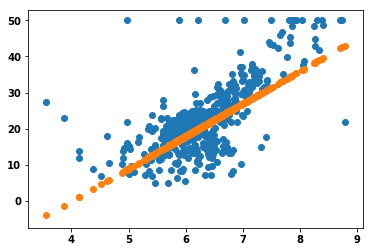

In [57]:
k = 9
b = -36
draw_rm_price()
plt.scatter(X[:, 5], price(X[:, 5], k, b))

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [58]:
from functools import lru_cache  #作用为缓存，去重，将函数运行结果保存，遇到传入相同参数时，使用缓存结果即可

In [59]:
solution = dict()

In [60]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    # init
    # D(i, 0) = i
    # D(0, j) = j
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    # start
    string1_tail = string1[-1]
    string2_tail = string2[-1]
    
    candidate = [
        (edit_distance(string1[:-1], string2) + 1, "Del {}".format(string1_tail)),  # 删除
        (edit_distance(string1, string2[:-1]) + 1, "Add {}".format(string2_tail))   # 插入
    ] 
    
    if string1_tail == string2_tail:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, "No Action")  # 无动作
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, "Sub {} -> {}".format(string1_tail, string2_tail)) # 替代
    
    candidate.append(both_forward)
    
    min_distance, operation = min(candidate, key=lambda x: x[0])
    
    if operation.startswith("Del"):
        solution[(string1, string2)] = [(string1[:-1], string2), "Del {}".format(string1_tail)]
    elif operation.startswith("Add"):
        solution[(string1, string2)] = [(string1, string2[:-1]), "Add {}".format(string2_tail)]
    elif operation.startswith("Sub"):
        solution[(string1, string2)] = [(string1[:-1], string2[:-1]), "Sub {} -> {}".format(string1_tail, string2_tail)]
    else:
        solution[(string1, string2)] = [(string1[:-1], string2[:-1]), "No Action"]
    
    #solution[(string1, string2)] = operation
    
    return min_distance

In [61]:
edit_distance('ABCDE', 'ABCCEF')

2

In [62]:
solution

{('A', 'A'): [('', ''), 'No Action'],
 ('A', 'AB'): [('A', 'A'), 'Add B'],
 ('A', 'ABC'): [('A', 'AB'), 'Add C'],
 ('A', 'ABCC'): [('A', 'ABC'), 'Add C'],
 ('A', 'ABCCE'): [('A', 'ABCC'), 'Add E'],
 ('A', 'ABCCEF'): [('A', 'ABCCE'), 'Add F'],
 ('AB', 'A'): [('A', 'A'), 'Del B'],
 ('AB', 'AB'): [('A', 'A'), 'No Action'],
 ('AB', 'ABC'): [('AB', 'AB'), 'Add C'],
 ('AB', 'ABCC'): [('AB', 'ABC'), 'Add C'],
 ('AB', 'ABCCE'): [('AB', 'ABCC'), 'Add E'],
 ('AB', 'ABCCEF'): [('AB', 'ABCCE'), 'Add F'],
 ('ABC', 'A'): [('AB', 'A'), 'Del C'],
 ('ABC', 'AB'): [('AB', 'AB'), 'Del C'],
 ('ABC', 'ABC'): [('AB', 'AB'), 'No Action'],
 ('ABC', 'ABCC'): [('ABC', 'ABC'), 'Add C'],
 ('ABC', 'ABCCE'): [('ABC', 'ABCC'), 'Add E'],
 ('ABC', 'ABCCEF'): [('ABC', 'ABCCE'), 'Add F'],
 ('ABCD', 'A'): [('ABC', 'A'), 'Del D'],
 ('ABCD', 'AB'): [('ABC', 'AB'), 'Del D'],
 ('ABCD', 'ABC'): [('ABC', 'ABC'), 'Del D'],
 ('ABCD', 'ABCC'): [('ABC', 'ABC'), 'Sub D -> C'],
 ('ABCD', 'ABCCE'): [('ABCD', 'ABCC'), 'Add E'],
 ('ABC

In [63]:
res = dict()
def parse_solution(string1 ,string2, solution):
    left_string1, right_string2 = solution[(string1, string2)][0]
    action = solution[(string1, string2)][1]
    
    res[(string1, string2)] = [(left_string1, right_string2), action]
    if not left_string1 and not right_string2: return "It's over"
    
    return parse_solution(left_string1, right_string2, solution)

In [64]:
parse_solution('ABCDE', 'ABCCEF', solution)

"It's over"

In [65]:
res

{('ABCDE', 'ABCCEF'): [('ABCDE', 'ABCCE'), 'Add F'],
 ('ABCDE', 'ABCCE'): [('ABCD', 'ABCC'), 'No Action'],
 ('ABCD', 'ABCC'): [('ABC', 'ABC'), 'Sub D -> C'],
 ('ABC', 'ABC'): [('AB', 'AB'), 'No Action'],
 ('AB', 'AB'): [('A', 'A'), 'No Action'],
 ('A', 'A'): [('', ''), 'No Action']}

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:通过求导/梯度计算，有方向性的拟合，一步一步的靠近目标函数

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:Gradient意思是下降的程度（函数沿着梯度方向下降最快），Descent表示方向


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:有方向性的变化，而且更快

4. Using the simple words to describe: What's the machine leanring.¶

Ans:通过大量数据的学习，在特定的任务中，机器能提高自身表现，达到预期的目的

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans:搜索问题的使用的是递归，重复的子问题还是会进行计算，这样会花费大量的时间，而动态规划将子问题的结果保留，避免了重复执行,节约很多时间

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:有些问题使用动态规划更简单，当然使用动态规划，特定的场景使用不同的方法

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:斐波那契数列，最短路径，旅行商问题

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:拼写纠错，DNA序列相似度，可拆分性的商品买卖

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans：Overlapping Subproblems：分析子问题的重复性，Overlapping Computing：将子问题的结果存储，便于重复调用
Parse Solution：对方法进行一步一步解析

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:1.将问题划分为子问题进行存储消耗大量的内存 2.对于不同的问题，没有通用的格式进行调用，需要根据情况构建方法解决问题

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [109]:
import random
import matplotlib.pylab as plt
import math

In [110]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]

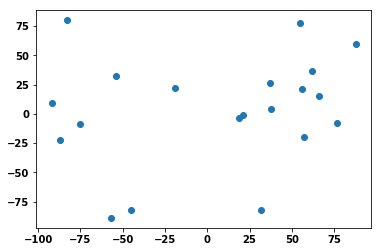

In [111]:
plt.scatter(coordinate_x, coordinate_y)

In [112]:
def get_distance(coord1, coord2):
    """计算两点的坐标"""
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

### 1. 先试试一个点出发(贪婪)

In [113]:
#先试试一个点
chosen_p = (-50, 10)
#点位坐标集合
coordinate_list = [(x, y) for x,y in zip(coordinate_x, coordinate_y)]

In [114]:
def get_shortest_path(start):
    """获得最短路径"""
    path = [start]
    for i in range(len(coordinate_list)):
        shortest_distance = float("inf")
        shortest_distance_coord = None
        for j in range(len(coordinate_list)):
            current_distance = get_distance(coordinate_list[j], start)
            if current_distance < shortest_distance:
                shortest_distance = current_distance
                shortest_distance_coord = coordinate_list[j]
        path.append(shortest_distance_coord)
        start = coordinate_list.pop(coordinate_list.index(shortest_distance_coord))
    return path

In [115]:
shortest_path = get_shortest_path(chosen_p)

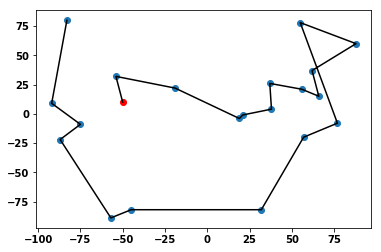

In [116]:
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
X = [x[0] for x in shortest_path]
Y = [y[1] for y in shortest_path]
plt.plot(X, Y, color="black")

In [117]:
#计算距离
distance = 0
for index, coord in enumerate(shortest_path[:-1]):
    distance += get_distance(shortest_path[index], shortest_path[index + 1])

In [118]:
distance

731.390263440336

### 2.动态规划

In [119]:
import numpy as np

In [120]:
#先试试一个点
chosen_p = (-50, 10)
coordinate_x.insert(0, chosen_p[0])
coordinate_y.insert(0, chosen_p[1])
#点位坐标集合
coordinate_list = [(x, y) for x,y in zip(coordinate_x, coordinate_y)]

In [121]:
coordinate_array = np.array(coordinate_list)

In [122]:
coordinate_array

array([[-50,  10],
       [ 62,  37],
       [ 66,  15],
       [ 88,  60],
       [-45, -82],
       [ 57, -20],
       [ 19,  -4],
       [ 56,  21],
       [ 37,  26],
       [-57, -89],
       [ 21,  -1],
       [-75,  -9],
       [ 55,  78],
       [ 77,  -8],
       [-83,  80],
       [-54,  32],
       [ 38,   4],
       [ 32, -82],
       [-19,  22],
       [-87, -22],
       [-92,   9]])

In [123]:
coordinate_array.shape

(21, 2)

In [124]:
#将两点之间的距离整合起来
distance_array = np.zeros((coordinate_array.shape[0], coordinate_array.shape[0]))

In [125]:
for i in range(coordinate_array.shape[0]):
    for j in range(coordinate_array.shape[0]):
               distance_array[i, j] = get_distance(coordinate_array[i], coordinate_array[j])

In [126]:
distance_array

array([[  0.        , 115.20850663, 116.10770862, 146.77874506,
         92.13576938, 111.12605455,  70.40596566, 106.56922633,
         88.45903006,  99.24716621,  71.84705979,  31.40063694,
        125.09596316, 128.26924807,  77.38862966,  22.36067977,
         88.20430828, 123.23960402,  33.24154028,  48.91829923,
         42.01190308],
       [115.20850663,   0.        ,  22.36067977,  34.71310992,
        160.03124695,  57.218878  ,  59.41380311,  17.08800749,
         27.31300057, 173.31185764,  55.90169944, 144.51643505,
         41.59326869,  47.4341649 , 151.24152869, 116.10770862,
         40.80441153, 122.72326593,  82.37718131, 160.25604513,
        156.52475842],
       [116.10770862,  22.36067977,   0.        ,  50.08991915,
        147.41099009,  36.138622  ,  50.69516742,  11.66190379,
         31.01612484, 161.07451692,  47.75981575, 143.02796929,
         63.95310782,  25.49509757, 162.56075787, 121.1981848 ,
         30.08321791, 102.78618584,  85.28774824, 157.4102

In [127]:
"""
N：坐标点总数量
coordinate_array：坐标数组
distance_array：两点距离数组
dp：动态规划的距离数组
path：每个点的下一步
"""
N = coordinate_array.shape[0]
start = 0

In [128]:
class TSP:
    def __init__(self, distance_array, start):
        self.distance_array = distance_array
        self.start = start
        self.path = np.zeros((N, 2 ** N))
        self.dp = np.zeros((N, 2 ** N))
        
    def set_transfer(self, l):
        """将未经过的点位集合转化内数字"""
        s = 0
        for i in range(0, len(l)):
            s += 2 ** l[i]
        return s

    def tsp(self):
        """TSP接口"""
        no_passed_list = [i for i in range(1, N)]
        return self._tsp(self.start, no_passed_list)

    def _tsp(self, init, s):
        """内部实现逻辑"""
        if self.dp[init][self.set_transfer(s)] != 0:
            return self.dp[init][self.set_transfer(s)]
        if len(s) == 0:
            return self.distance_array[init][self.start]

        min_distance = float("inf")

        for i in range(len(s)):
            no_passed_list_copy = s.copy()
            no_passed_list_copy.pop(i)
            distance = self.distance_array[init][s[i]] + self._tsp(s[i], no_passed_list_copy)
            if distance < min_distance:
                min_distance = distance
                next_init = s[i]

        no_passed_transfer_num = self.set_transfer(s)

        self.path[init][no_passed_transfer_num] = next_init
        self.dp[init][no_passed_transfer_num] = min_distance

        return min_distance
        

In [129]:
# 老电脑性能不行。。。
T = TSP(distance_array, 0)
T.tsp()

751.144998305677

In [134]:
T.path

array([[ 0.,  0.,  0., ...,  0., 18.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [139]:
# num_list = [i for i in range(T.distance_array)]
num_list = [i for i in range(len(coordinate_list))]
start = 0
res = []  # 收集点位路径
while len(num_list) > 0:
    num_list.pop(num_list.index(start))
    m = T.set_transfer(num_list)
    next = int(T.path[start][m])
    print(start, '->', next)
    res.append(start)
    start = next

0 -> 18
18 -> 6
6 -> 10
10 -> 16
16 -> 8
8 -> 12
12 -> 3
3 -> 1
1 -> 7
7 -> 2
2 -> 13
13 -> 5
5 -> 17
17 -> 4
4 -> 9
9 -> 19
19 -> 11
11 -> 20
20 -> 14
14 -> 15
15 -> 0


In [140]:
res

[0, 18, 6, 10, 16, 8, 12, 3, 1, 7, 2, 13, 5, 17, 4, 9, 19, 11, 20, 14, 15]

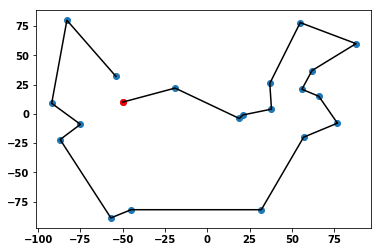

In [141]:
# 画图
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
X = [coordinate_list[x][0] for x in res]
Y = [coordinate_list[x][1] for x in res]
plt.plot(X, Y, color="black")

### 三个起始点（方法很low = ，=）

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [98]:
#随机点位坐标
coordinate_x = [random.randint(-100, 100) for _ in range(20)]
coordinate_y = [random.randint(-100, 100) for _ in range(20)]

In [99]:
chosen_p1 = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

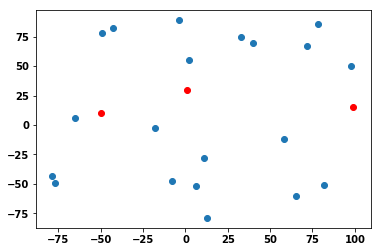

In [100]:
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p1[0]], [chosen_p1[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

#### 思路： 以三个点来划分三个区域，取两个点中心线平行y轴

In [101]:
chosen_sort = sorted([chosen_p1, chosen_p2, chosen_p3], key = lambda x:x[0])

In [102]:
# 三个点两条分割线
mid_line12 = (chosen_sort[1][0] + chosen_sort[0][0]) // 2
mid_line23 = (chosen_sort[2][0] + chosen_sort[1][0]) // 2
# 点位坐标集合
coordinate_list = [(x, y) for x, y in zip(coordinate_x, coordinate_y)]

In [103]:
#将点位根据分割线分为三部分
coordinate_list_1 = []
coordinate_list_2 = []
coordinate_list_3 = []
for coord in coordinate_list:
    if coord[0] <= mid_line12:
        coordinate_list_1.append(coord)
    elif mid_line12 < coord[0] <= mid_line23:
        coordinate_list_2.append(coord)
    else:
        coordinate_list_3.append(coord)
coordinate_list_2

[(-8, -48),
 (40, 70),
 (2, 55),
 (-18, -3),
 (11, -28),
 (-4, 89),
 (6, -52),
 (13, -79),
 (33, 75)]

In [104]:
def get_shortest_path(start,coordinate_list):
    """获得最短路径"""
    path = [start]
    for i in range(len(coordinate_list)):
        shortest_distance = float("inf")
        shortest_distance_coord = None
        for j in range(len(coordinate_list)):
            current_distance = get_distance(coordinate_list[j], start)
            if current_distance < shortest_distance:
                shortest_distance = current_distance
                shortest_distance_coord = coordinate_list[j]
        path.append(shortest_distance_coord)
        start = coordinate_list.pop(coordinate_list.index(shortest_distance_coord))
    return path

In [105]:
# 获取最短路径
shortest_path_1 = get_shortest_path(chosen_p1, coordinate_list_1)
shortest_path_2 = get_shortest_path(chosen_p2, coordinate_list_2)
shortest_path_3 = get_shortest_path(chosen_p3, coordinate_list_3)

In [106]:
# 计算路径
distance = 0
for path in [shortest_path_1,shortest_path_2,shortest_path_3]:
    for index, coord in enumerate(path[:-1]):
        distance += get_distance(path[index], path[index + 1])

In [107]:
distance

776.8737788117976

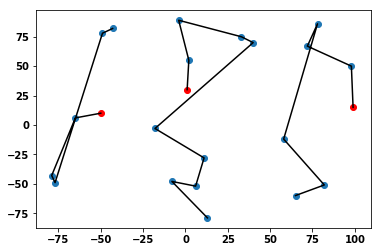

In [108]:
# 画图
plt.scatter(coordinate_x, coordinate_y)
plt.scatter([chosen_p1[0]], [chosen_p1[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')
X1 = [x[0] for x in shortest_path_1]
Y1 = [y[1] for y in shortest_path_1]
X2 = [x[0] for x in shortest_path_2]
Y2 = [y[1] for y in shortest_path_2]
X3 = [x[0] for x in shortest_path_3]
Y3 = [y[1] for y in shortest_path_3]
plt.plot(X1, Y1, color="black")
plt.plot(X2, Y2, color="black")
plt.plot(X3, Y3, color="black")

shuro